# Exercise 1 - Equation of state, stratification

## Import the required packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gsw
import xarray as xr

## Load the profile datasets. They are annual mean profiles of T and S at a specific location.

In [3]:
fnt = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc',decode_times=False)
fns = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/salinity/decav/1.00/woa18_decav_s00_01.nc',decode_times=False)
lonidx = 150
latidx = 113
in_situ_temperature = fnt.t_an[0,:,latidx,lonidx]
practical_salinity = fns.s_an[0,:,latidx,lonidx]
z = -1*fnt.depth.values
lon = fnt.lon[lonidx].values
lat = fnt.lat[latidx].values
pressure = gsw.p_from_z(z,lat=lat)

## Plot the temperature and salinity profile

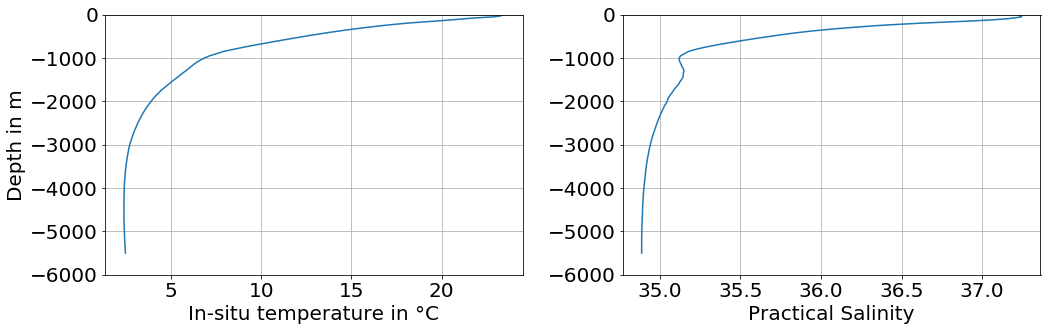

In [4]:
plt.rcParams['font.size']=20
numsubplots = 2
fig,ax = plt.subplots(1,numsubplots,figsize=(15,5))
ax[0].plot(in_situ_temperature,z)
ax[1].plot(practical_salinity,z)
for i in range(numsubplots):
    ax[i].set_ylim([-6000,0])
    ax[i].grid()
ax[0].set_ylabel('Depth in m')
ax[0].set_xlabel('In-situ temperature in °C')
ax[1].set_xlabel('Practical Salinity')
plt.tight_layout()
plt.show()

# The (sub-)questions from the Problem Set will be tackled below. Some guidance is given along the way.

## 1d) Using the Jupyter notebook, reproduce the profile plots and include the potential temperature and absolute salinity profile, respectively.

Before plotting the potential temperature and absolute salinity profiles, you first need to calculate them. Therefore you can use the gsw (Gibbs Seawater library) package. The functions **gsw.SA_from_SP(SP, p, lon, lat)** and **gsw.pt_from_t(SA,t,p,p_ref)** will be useful for this.

Use a reference pressure of p_ref = 0 dbar.

You can learn more about these functions and how to use them by just typing and executing **gsw.SA_from_SP?** or **gsw.pt_from_t?**.

In [5]:
### HERE GOES YOUR CALCULATION OF THE ABSOLUTE SALINITY AND POTENTIAL TEMPERATURE PROFILE

Repeat the plot from above and include the absolute salinity and potential temperature profiles

In [6]:
plt.rcParams['font.size']=20
numsubplots = 2
fig,ax = plt.subplots(1,numsubplots,figsize=(18,5),sharey=True)
ax[0].plot(in_situ_temperature,z,label='in-situ temperature')
ax[1].plot(practical_salinity,z,label='practical salinity')
### HERE YOU NEED TO ADD YOUR LINES

for i in range(numsubplots):
    ax[i].set_ylim([-6000,0])
    ax[i].grid()
    ax[i].legend(loc=4)
ax[0].set_xlabel('Temperature in °C')
ax[0].set_ylabel('Depth in m')
ax[1].set_xlabel('Salinity')
plt.show()

## 1e) Using the Jupyter notebook, calculate the potential density anomaly profile from the temperature and salinity profile (referenced to a pressure of 0dbar). Plot the potential density anomaly profile in depth space and in TS-space.

Calculate the potential density anomaly profile (referenced to 0dbar). For this the functions **gsw.sigma0(SA, CT)** and **gsw.CT_from_t(SA,t,p)** are of help. 

You will need to first calculate the "conservative temperature", which is yet another temperature definition.

In [7]:
### HERE GOES THE CALCULATION OF THE POTENTIAL DENSITY ANOMALY 


Plot the potential density profiles once in depth space and once in TS-space. For the plot in depth space you can use the **plt.plot()** function. For the TS-space you can use the **plt.scatter()** function. Note that you need to use **ax[0].plot(...)** and **ax[1].scatter(...)** to plot into the profile into the respective subplot.

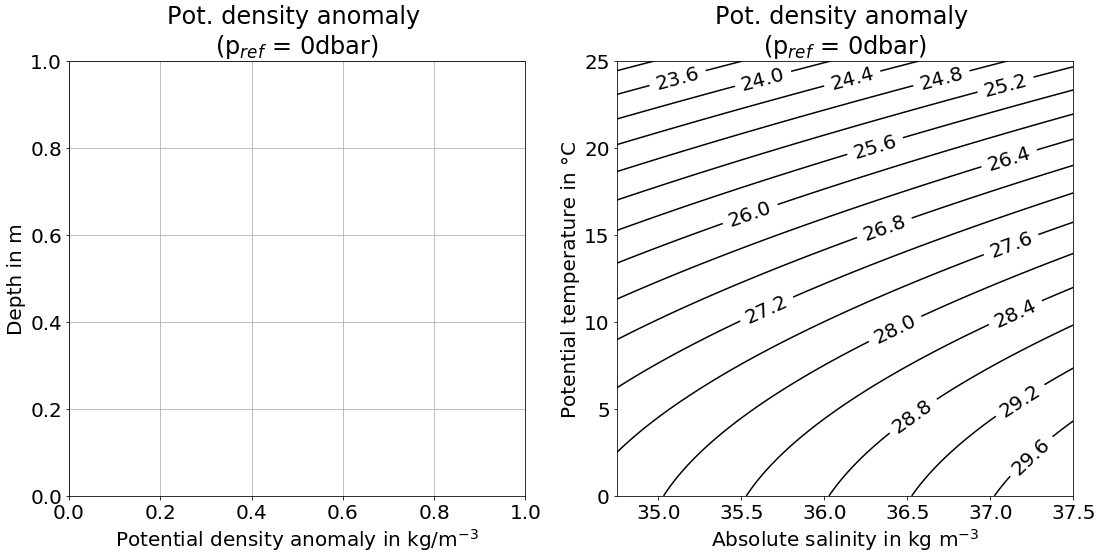

In [8]:
# first we need to generate a TS potential density anomaly field (for all combinations of temperature and salinity) for the TS Diagram.
pt = np.linspace(0., 25., 129)   # make a potential temperature vector
SA = np.linspace(34.75, 37.5, 129)   # make an absolute salinity vector
S,PT = np.meshgrid(SA,pt)          # make 2D arrays out of SA and t
CT = gsw.CT_from_pt(S,PT)          # from the potental temperature calculate the conservative temperature
pot_density_field_sigma0 = gsw.sigma0(S,CT)    # calculate the potential density anomaly field for each combination of temperature and salinity
# The variable "pot_density_field_sigma0" contains now the potential density anomaly for all combinations of temperature and salinity. 
# The resulting density field of all the comibnations is indicated by the black curved lines in the TS Diagram.

plt.rcParams['font.size']=20
numsubplots = 2
fig,ax = plt.subplots(1,numsubplots,figsize=(18,8))
ax[0].grid()
ax[0].set_xlabel(r'Potential density anomaly in kg/m$^{-3}$')
ax[0].set_ylabel('Depth in m')
ax[0].set_title('Pot. density anomaly \n'+r'(p$_{ref}$ = 0dbar)')
c0 = ax[1].contour(S,PT,pot_density_field_sigma0,21,colors='k')
ax[1].clabel(c0,fmt='%1.1f',fontsize=20)
ax[1].set_xlabel('Absolute salinity in kg m$^{-3}$')
ax[1].set_ylabel('Potential temperature in °C')
ax[1].set_title('Pot. density anomaly \n'+r'(p$_{ref}$ = 0dbar)')
### HERE INCLUDE THE PROFILES. 
# Be careful that your potential temperature and absolute salinity profiles calculated in 1d) are not overwritten (i.e. defined again) by the variables created in the upper part of this box.
plt.show()